# 0. Imports and data selection

In [1]:
import os
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [2]:
os.chdir('../data')
file_names = os.listdir()

In [3]:
df = pd.DataFrame()
for name in file_names:
    df = df.append(pd.read_csv(f'../data/{name}'))

In [4]:
df.columns

Index(['Unnamed: 0', 'name', 'datetime', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions',
       'description', 'icon', 'stations'],
      dtype='object')

In [5]:
# use datetime as type
df['datetime'] = df['datetime'].astype("datetime64")

# setting the Date as index
df = df.set_index('datetime')

In [6]:
# cut of the first days to have full periods of a year
_day = df.index[-1].day
_month = df.index[-1].month
_year = df.index[0].year

df = df[df.index>=f'{_year}-{_month}-{_day}']

In [21]:
start_year = df.index.min().year
end_year = df.index.max().year
print('period:', start_year,'-', end_year)

period: 1993 - 2022


# 1. Temperature

## 1.1 Frequency of the daily average, max. and min. temperature

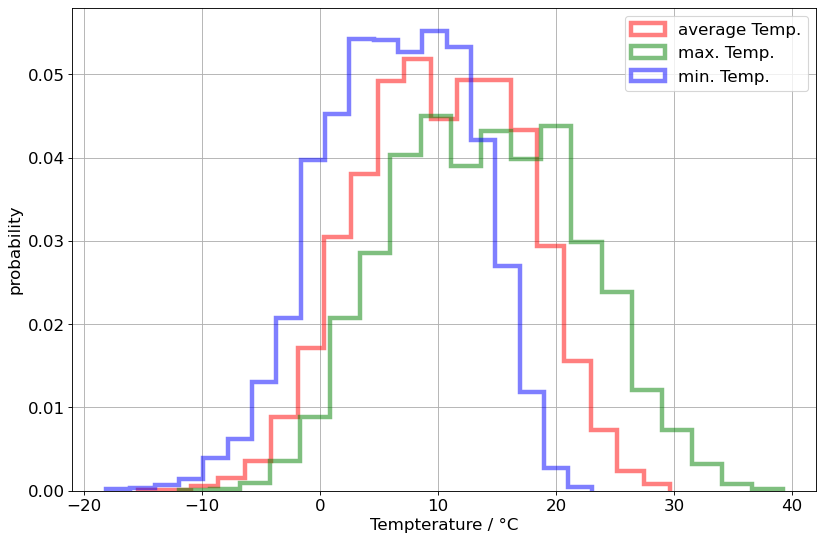

In [8]:
# frequency of the daily average temperature, max. temp
plt.figure(figsize=(12,8), dpi=80)
plt.hist(df['temp'], bins=20, histtype='step', density=True, stacked=True, color='red', linewidth=4, label='average Temp.', alpha=0.5)
plt.hist(df['tempmax'], bins=20, histtype='step', density=True, stacked=True, color='green', linewidth=4, label='max. Temp.', alpha=0.5)
plt.hist(df['tempmin'], bins=20, histtype='step', density=True, stacked=True, color='blue', linewidth=4, label='min. Temp.', alpha=0.5)


plt.xlabel('Tempterature / °C', fontsize=15)
plt.ylabel('probability', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(fontsize=15)
plt.savefig(f'../figures/pdf/frequency_temp_{start_year}-{end_year}.pdf')
plt.savefig(f'../figures/png/frequency_temp_{start_year}-{end_year}.png', dpi=300)

plt.show()

## 1.2 Temperature progress and the hottest/coldest days

### Extreme days (hottest/coldest)

In [9]:
# hottest days
df_hot = df.sort_values(by=['tempmax'], ascending=False)[['tempmax', 'tempmin', 'temp', 'moonphase']]
df_hot.head(10)

,tempmax,tempmin,temp,moonphase
datetime,,,,
2019-07-25,39.2,18.4,29.7,0.78
2022-07-19,37.7,13.6,26.2,0.70
2019-07-24,37.6,18.2,28.2,0.73
2002-06-18,37.1,20.9,27.5,0.28
2018-08-07,37.0,18.9,28.3,0.90
2003-08-08,36.1,21.0,28.9,0.42
2015-07-02,36.1,18.7,29.7,0.50
2003-08-07,36.0,18.3,27.7,0.37
2006-07-19,36.0,17.7,27.9,0.85


In [10]:
# coldest days
df_cold = df.sort_values(by=['tempmin'], ascending=True)[['tempmax', 'tempmin', 'temp', 'moonphase']]
df_cold.head(10)

,tempmax,tempmin,temp,moonphase
datetime,,,,
1997-01-01,-11.9,-18.1,-15.4,0.73
2021-02-12,-4.3,-17.3,-10.5,0.00
1997-01-02,-9.0,-16.2,-13.2,0.78
2009-01-07,-3.9,-16.1,-7.9,0.41
1996-12-31,-8.8,-15.7,-12.9,0.68
2021-02-13,-1.5,-15.4,-8.3,0.02
2021-02-10,-3.7,-15.2,-8.9,1.00
1993-11-07,7.0,-15.0,5.5,0.77
2012-02-07,-5.6,-14.9,-10.4,0.50


### Linear Regression: Temperature 

In [11]:
ydata=df['temp'].values
xdata=np.arange(ydata.size)

In [12]:
linear_temp=np.polyfit(xdata,ydata,1)  # OR coef, cov = curve_fit(lambda x,a,b: a*x+b, xdata, ydata)
linear_temp_fn=np.poly1d(linear_temp)
a = linear_temp[0]
b = linear_temp[1]
print(f'Annual temp. increase: {a*360:.2f} °C')
print(f'Temp. increase all 10 years: {a*360*10:.2f} °C')

Annual temp. increase: 0.05 °C
Temp. increase all 10 years: 0.55 °C


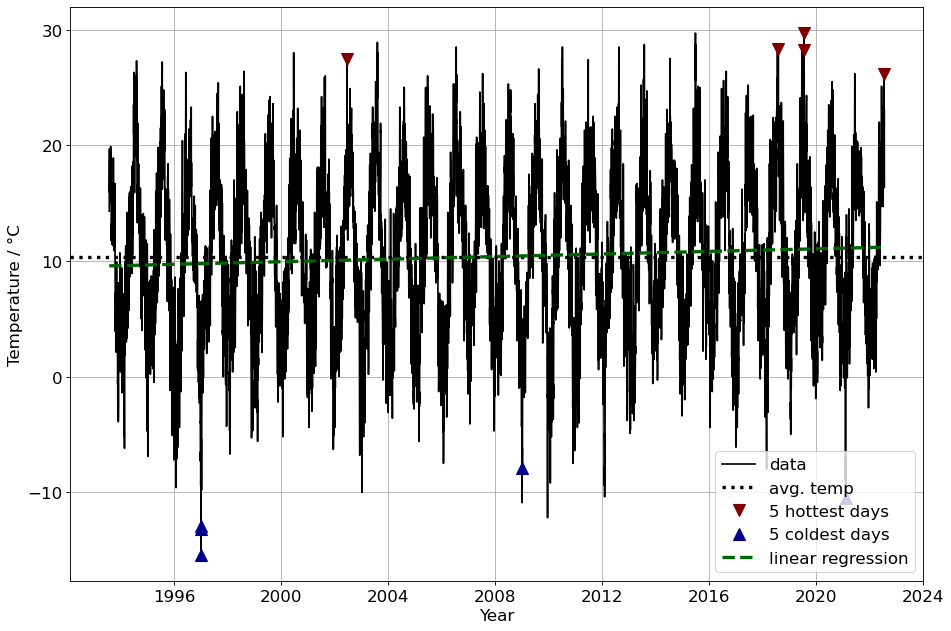

In [14]:
plt.figure(figsize=(12,8), dpi=80)
plt.plot(df['temp'], '-', color='black', label='data')
plt.axhline(df['temp'].mean(), linewidth=3, linestyle='dotted', color='black', label='avg. temp')
plt.plot(df_hot['temp'].head(5), ' ', marker='v', markersize=10, color='#800000', label='5 hottest days')
plt.plot(df_cold['temp'].head(5), ' ', marker='^', markersize=10, color='#00008b', label='5 coldest days')
plt.plot([df.index[0], df.index[-1]], [b, a*ydata.size+b], color='#006400', linestyle='--', linewidth=3, label='linear regression')

plt.grid()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Temperature / °C', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig(f'../figures/pdf/temp_timeline_{start_year}-{end_year}.pdf')
plt.savefig(f'../figures/png/temp_timeline_{start_year}-{end_year}.png', dpi=300)
plt.show()

## 1.3 Minimal, maximal and average temperature of each year

In [15]:
max_temp_year = []
min_temp_year = []
avg_temp_year = []

for year in range(start_year, end_year+1):
    max_temp_year.append(df[(df.index>=str(year)) & (df.index<=str(year+1))]['tempmax'].max()) # get max temp of the year
    min_temp_year.append(df[(df.index>=str(year)) & (df.index<=str(year+1))]['tempmin'].max()) # get max temp of the year
    avg_temp_year.append(df[(df.index>=str(year)) & (df.index<=str(year+1))]['temp'].max()) # get max temp of the year

len(max_temp_year)

30

In [16]:
x = np.arange(start_year, end_year+1)

In [17]:
# linear regression
# max. Temperature
linear_max=np.polyfit(x,max_temp_year,1)
linear_max_fn=np.poly1d(linear_max)
print(f'Increase of daily max. Temperature in ten years {linear_max[0]*10:.2f} °C')

# min. Temperature
linear_min=np.polyfit(x,min_temp_year,1)
linear_min_fn=np.poly1d(linear_min)
print(f'Increase of daily min. Temperature in ten years {linear_min[0]*10:.2f} °C')

# avg. Temperature
linear_avg=np.polyfit(x,avg_temp_year,1)
linear_avg_fn=np.poly1d(linear_avg)
print(f'Increase of daily avg. Temperature in ten years {linear_avg[0]*10:.2f} °C')


Increase of daily max. Temperature in ten years 1.26 °C
Increase of daily min. Temperature in ten years 0.52 °C
Increase of daily avg. Temperature in ten years 0.77 °C


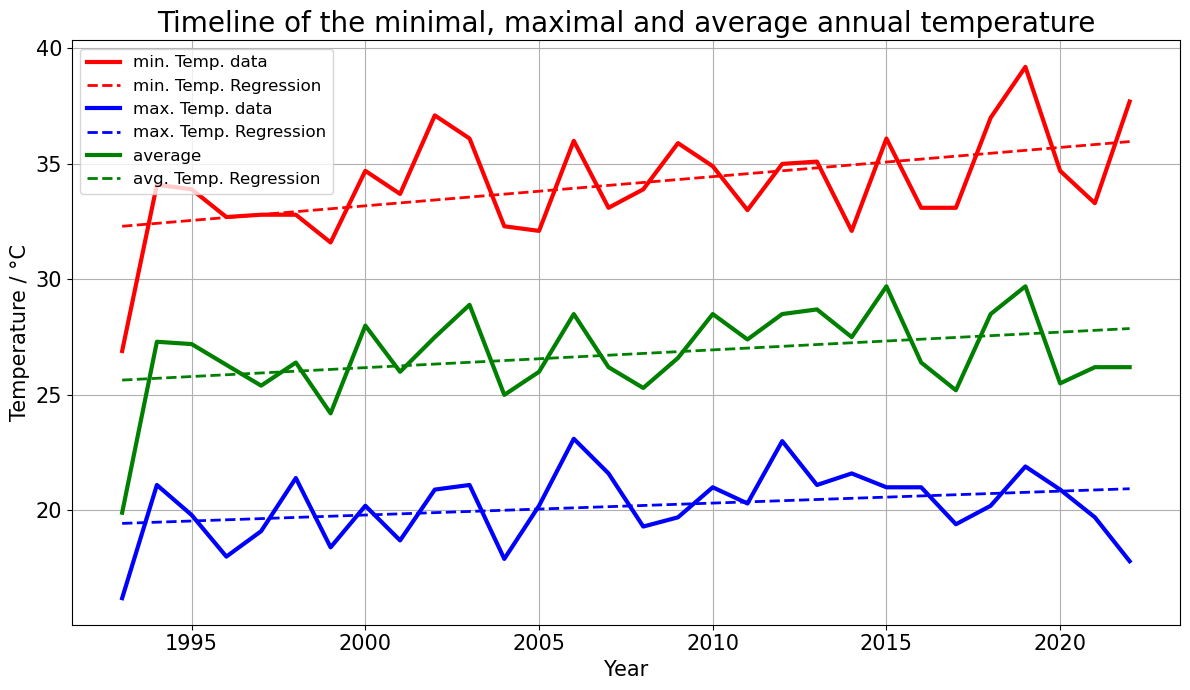

In [18]:
plt.figure(figsize=(12,7), dpi=100)
plt.plot(x, max_temp_year, color='red', linewidth=3, label='min. Temp. data')
plt.plot(x,linear_max_fn(x), '--', color='red', linewidth=2, label='min. Temp. Regression')

plt.plot(x, min_temp_year, color='blue', linewidth=3, label='max. Temp. data')
plt.plot(x,linear_min_fn(x), '--', color='blue', linewidth=2, label='max. Temp. Regression')

plt.plot(x, avg_temp_year, color='green', linewidth=3, label='average')
plt.plot(x,linear_avg_fn(x), '--', color='green', linewidth=2, label='avg. Temp. Regression')

plt.grid()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Temperature / °C', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(f'Timeline of the minimal, maximal and average annual temperature', fontsize=20)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# 2. Rain progress